In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from tqdm import tqdm

## I) Data Preprocessing

In [2]:
#prob
paths = pd.read_csv('../database/paths.sql',error_bad_lines=False,  sep='\t', names = ['line_id', 'path_id', 'english_name', 'french_name', 'arabic_name', 'tag'])

In [3]:
#preprocessing
paths.iloc[8,-1] = '0'
ch = paths.iloc[25,-1]
paths.iloc[25,-2] = (paths.iloc[25,-2] + ch).replace('//','')
paths.iloc[25,-1] = 1

In [4]:
paths.tag = paths.tag.astype(int)

In [5]:
paths.head()

,line_id,path_id,english_name,french_name,arabic_name,tag
0,1,8,Intilaka vers Barcelona,Intilaka vers Barcelone,الإنطلاقة في إتجاه برشلونة,1
1,3,8,Barcelone to Intilaka,Barcelona vers Intilaka,برشلونة في إتجاه الإنطلاقة,0
2,4,4,Tunis Marine to Campus Manouba,Tunis Marine vers Campus Manouba,تونس البحرية في إتجاه المركب الجامعي بمنوبة,0
3,5,4,Campus Manouba toTunis Marine,Campus Manouba vers Tunis Marine,المركب الجامعي بمنوبة في إتجاه تونس البحرية,1
4,6,2,Republique to Ariana,Republique vers Ariana,الجمهورية في إتجاه أريانة,0


In [6]:
stops = pd.read_csv('../database/stops.sql', error_bad_lines=False,  sep='\t', names = ['english_name', 'french_name', 'arabic_name', 'latitude', 'longitude'])
stops = stops.reset_index().rename({'index':'station_id'},axis=1)
stops.head()

,station_id,english_name,french_name,arabic_name,latitude,longitude
0,15,TUNIS MARINE,TUNIS MARINE,تونس البحرية,36.800174,10.190487
1,16,STREET OF TURKISH,RUE DE LA TURQUIE,نهج تركيا,36.799103,10.186369
2,20,MONCEF BEY,MONCEF BEY,المنصف باي,36.792631,10.185839
3,21,HOPSPITAL MILITARY,HOPITAL MILITAIRE,المستشفى العسكري,36.785595,10.179933
4,22,HOPITAL HABIB THAMEUR,HOPITAL HABIB THAMEUR,مستشفى الحبيب ثامر,36.784376,10.175823


In [7]:
path_stop = pd.read_csv('../database/path_stop.sql', sep='\t', names = ['id', 'line_id', 'station_id', 'order']).drop('id',axis=1)
path_stop.head()

,line_id,station_id,order
0,1,1,1
1,1,2,2
2,1,3,3
3,1,4,4
4,1,5,5


In [8]:
lines = pd.read_csv('../database/lines.sql', sep='\t').drop(['2.2','2.3'],axis = 1).rename({'2':'path_id','2.1':'line_label'},axis=1)
lines.head()

,path_id,line_label
0,4,104
1,6,Empty Line
2,7,6
3,8,5
4,9,3


### 1) Generate station paths : merge path_stop with stops

In [9]:
station_paths = path_stop.merge(stops, on='station_id').sort_values(['line_id','order'])
station_paths.head()

,line_id,station_id,order,english_name,french_name,arabic_name,latitude,longitude
268,1,161,1,CITE EL INTILAKA,CITE EL INTILAKA,حي الإنطلاقة,36.838918,10.117072
266,1,160,2,ETTADHAMEN,ETTADHAMEN,التضامن,36.835840,10.117590
455,1,105,3,OMRANE SUPÉRIEUR,OMRANE SUPÉRIEUR,العمران الأعلى,36.830582,10.124005
264,1,159,4,ETTAHRIR,ETTAHRIR,التحرير,36.829180,10.128620
260,1,158,5,LES JASMINS,LES JASMINS,الياسمين,36.825880,10.134540


In [10]:
station_paths.isnull().sum()

line_id         0
station_id      0
order           0
english_name    0
french_name     0
arabic_name     0
latitude        3
longitude       0
dtype: int64

In [11]:
#fix foyer bardo 2 station coordinates
station_paths.iloc[301,-2] = 36.818324
station_paths.iloc[301,-1] = 10.141400

#fix stade ibn kholdoun station coordiantes
station_paths.iloc[286,-2] = 36.833022
station_paths.iloc[286,-1] = 10.136255

#fix mosque ibn kholdoun station coordinates
station_paths.iloc[284,-2] = 36.829171
station_paths.iloc[284,-1] = 10.135974

In [12]:
station_paths.isnull().sum()

line_id         0
station_id      0
order           0
english_name    0
french_name     0
arabic_name     0
latitude        0
longitude       0
dtype: int64

In [13]:
station_paths.head()

,line_id,station_id,order,english_name,french_name,arabic_name,latitude,longitude
268,1,161,1,CITE EL INTILAKA,CITE EL INTILAKA,حي الإنطلاقة,36.838918,10.117072
266,1,160,2,ETTADHAMEN,ETTADHAMEN,التضامن,36.835840,10.117590
455,1,105,3,OMRANE SUPÉRIEUR,OMRANE SUPÉRIEUR,العمران الأعلى,36.830582,10.124005
264,1,159,4,ETTAHRIR,ETTAHRIR,التحرير,36.829180,10.128620
260,1,158,5,LES JASMINS,LES JASMINS,الياسمين,36.825880,10.134540


### 2) Genetrate line_paths : merge lines with paths

In [14]:
lines = lines.append({'path_id':2,'line_label':'2'},ignore_index=True)

In [16]:
line_paths = paths.merge(lines,on='path_id')
line_paths.to_csv('data/line_paths.csv', index=False)
line_paths.head()

,line_id,path_id,english_name,french_name,arabic_name,tag,line_label
0,1,8,Intilaka vers Barcelona,Intilaka vers Barcelone,الإنطلاقة في إتجاه برشلونة,1,5
1,3,8,Barcelone to Intilaka,Barcelona vers Intilaka,برشلونة في إتجاه الإنطلاقة,0,5
2,4,4,Tunis Marine to Campus Manouba,Tunis Marine vers Campus Manouba,تونس البحرية في إتجاه المركب الجامعي بمنوبة,0,104
3,5,4,Campus Manouba toTunis Marine,Campus Manouba vers Tunis Marine,المركب الجامعي بمنوبة في إتجاه تونس البحرية,1,104
4,6,2,Republique to Ariana,Republique vers Ariana,الجمهورية في إتجاه أريانة,0,2


### 3) Final station paths merging and preprocessing

In [17]:
station_paths = station_paths.merge(line_paths[['line_id','path_id','line_label','tag']], on = 'line_id')

In [18]:
def vehicle(x):
    if x == 'TGM' : 
        # 1 for TGM
        return 1
    elif x in ['1','2','3','4','5','6'] :
        #2 for Metro
        return 2
    else:
        #3 for Bus
        return 3

In [19]:
station_paths['vehicle_type'] = station_paths.line_label.apply(vehicle)
station_paths.head()

,line_id,station_id,order,english_name,french_name,arabic_name,latitude,longitude,path_id,line_label,tag,vehicle_type
0,1,161,1,CITE EL INTILAKA,CITE EL INTILAKA,حي الإنطلاقة,36.838918,10.117072,8,5,1,2
1,1,160,2,ETTADHAMEN,ETTADHAMEN,التضامن,36.835840,10.117590,8,5,1,2
2,1,105,3,OMRANE SUPÉRIEUR,OMRANE SUPÉRIEUR,العمران الأعلى,36.830582,10.124005,8,5,1,2
3,1,159,4,ETTAHRIR,ETTAHRIR,التحرير,36.829180,10.128620,8,5,1,2
4,1,158,5,LES JASMINS,LES JASMINS,الياسمين,36.825880,10.134540,8,5,1,2


<AxesSubplot:>

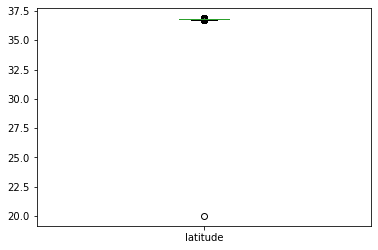

In [20]:
station_paths.latitude.plot(kind='box')

<AxesSubplot:>

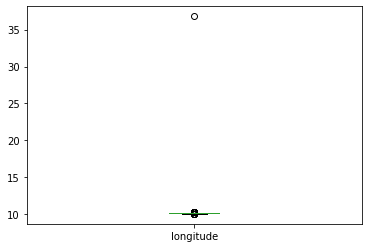

In [21]:
station_paths.longitude.plot(kind='box')

In [22]:
#stop correction
station_paths.loc[343,'arabic_name'] = '20 مارس'
station_paths.loc[343,'latitude'] = 36.807718
station_paths.loc[343,'longitude'] = 10.139172

In [23]:
#assing a unique id for each station

unique_coords = station_paths[['latitude', 'longitude']].drop_duplicates().reset_index(drop=True)

n = unique_coords.shape[0]
unique_station_id = np.arange(1,n+1)

unique_coords['station_id'] = unique_station_id

station_paths.drop('station_id', axis=1, inplace=True)

station_paths = unique_coords.merge(station_paths, on = ['latitude', 'longitude'])
station_paths = station_paths.sort_values(['line_id','order'])

In [24]:
station_paths = station_paths[~station_paths[['line_id','station_id']].duplicated()]

In [25]:
station_paths[['line_id','station_id']].duplicated().unique()

array([False])

In [26]:
#correct order
station_paths['order'] = station_paths.groupby('line_id').order.cumcount() + 1

### correct duplicated stops labels with same coordinates : 

In [27]:
station_paths_unique = station_paths[['french_name','english_name','arabic_name','station_id']].drop_duplicates()

In [28]:
mask = station_paths_unique.station_id.duplicated()

In [29]:
duplicated_stations = station_paths_unique[mask].station_id.values
duplicated_stations

array([ 35,  28,  23, 138, 137, 161])

In [30]:
replace_english = dict((key,value) \
                  for key, value in \
                  zip(station_paths_unique[station_paths_unique.station_id.isin(duplicated_stations)].groupby('station_id').english_name.last().values,\
                      station_paths_unique[station_paths_unique.station_id.isin(duplicated_stations)].groupby('station_id').english_name.first().values) )

In [31]:
replace_french = dict((key,value) \
                 for key, value in \
                 zip(station_paths_unique[station_paths_unique.station_id.isin(duplicated_stations)].groupby('station_id').french_name.last().values,\
                     station_paths_unique[station_paths_unique.station_id.isin(duplicated_stations)].groupby('station_id').french_name.first().values) )

In [32]:
replace_arabic = dict((key,value) \
                 for key, value in \
                 zip(station_paths_unique[station_paths_unique.station_id.isin(duplicated_stations)].groupby('station_id').arabic_name.last().values,\
                     station_paths_unique[station_paths_unique.station_id.isin(duplicated_stations)].groupby('station_id').arabic_name.first().values) )

In [33]:
replace_english

{'DARGHOUTH PACHA STREET': 'UNIVERSITÉ IBN CHARAF',
 'CHEBBI': 'CHEBBI',
 'GOUVERNORAT MANOUBA': 'GOVERNORATE MANOUBA',
 'HABIB BOUGATFA AVENUE - FOYER BARDO 2': 'FOYER BARDO 2',
 'RAS TABIA - TRAINING CENTER': 'CENTER DE FORMATION RAS TABIA',
 'Thamer Garden': 'HABIB THAMEUR'}

In [34]:
replace_french

{'RUE DARGHOUTH PACHA': 'UNIVERSITÉ IBN CHARAF',
 'CHEBBI': 'CHEBBI',
 'GOUVERNORAT MANOUBA': 'GOUVERNORAT MANOUBA',
 'AVENUE HABIB BOUGATFA - FOYER BARDO 2': 'FOYER BARDO 2',
 'RAS TABIA - CENTRE DE FORMATION': 'CENTER DE FORMATION RAS TABIA',
 'Jardin Thamer': 'HABIB THAMEUR'}

In [35]:
replace_arabic

{'نهج درغوث باشا': 'جامعة ابن شرف',
 'الشابي': 'الشابى',
 'ولاية منوبة': 'ولاية منوبة',
 'شارع الحبيب بوقطفة - مبيت باردو 2': 'مبيت باردو 2',
 'راس طابية - مركز التكوين': 'مركز التكوين رأس الطابية',
 'حديقة ثامر': 'الحبيب ثامر'}

In [36]:
#replace duplicated stops labels with same coordinates
station_paths.english_name = station_paths.english_name.replace(replace_english)
station_paths.french_name = station_paths.french_name.replace(replace_french)
station_paths.arabic_name = station_paths.arabic_name.replace(replace_arabic)

In [37]:
#verification
station_paths_unique = station_paths[['french_name','english_name','arabic_name','station_id']].drop_duplicates()
mask = station_paths_unique.station_id.duplicated()
duplicated_stations = station_paths_unique[mask].station_id.values
print('no duplicated stops labels !') if len(duplicated_stations) == 0 else print('there are still some duplicated labels')

no duplicated stops labels !


### data checkpoint

In [38]:
station_paths.to_csv('data/stations_paths.csv',index=False)

In [39]:
paths.to_csv('data/paths.csv', index = False)

In [40]:
station_paths.shape

(700, 12)

In [41]:
paths.shape

(45, 6)

## II) Pick Time Algorithm

In [42]:
#load checkpoint
station_paths = pd.read_csv('data/stations_paths.csv')
paths = pd.read_csv('data/paths.csv')

### 1) Haversine formula

In [43]:
def haversine_distance(x,y):
    R = 6378137 #in meter

    #convert to raduis
    lat1  = x[0] * np.pi/180
    long1 = x[1] * np.pi/180
    lat2  = y[0] * np.pi/180
    long2 = y[1] * np.pi/180
    
    #calculate haversine distance
    delta_longitude = long1 - long2
    delta_latitude = lat1 - lat2
    a = (np.sin(delta_latitude/2)**2) + np.cos(lat1)*np.cos(lat2)*(np.sin(delta_longitude/2)**2)
    c = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    distance = R*c
    
    return distance

### 2) Stops Clustering ( inductive unsupervised learning )

In [44]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs

In [45]:
line_vehicletype = dict((key,value['line_id']) \
                        for key, value in station_paths[['line_id','vehicle_type']].drop_duplicates().groupby('vehicle_type').agg(list).T.to_dict().items())

In [46]:
def affinity(x):    
    return pairwise_distances(x, metric=haversine_distance)

In [47]:
model=AgglomerativeClustering(n_clusters=None, distance_threshold=1000, affinity=affinity, linkage='average')
model.fit(station_paths[['latitude','longitude']].values) 
station_paths['station_cluster'] = model.labels_

In [48]:
len(np.unique(model.labels_))

48

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(station_paths[['latitude','longitude']], station_paths.station_cluster)

KNeighborsClassifier(n_neighbors=1)

In [50]:
centers = station_paths[['latitude','longitude','station_cluster']].groupby('station_cluster').mean().values
std = np.ones(centers.shape)*0.001
centroids = station_paths[['latitude','longitude','station_cluster']].groupby('station_cluster', as_index=False).mean()

In [51]:
#test data simulation :

X,_ = make_blobs(n_samples=10000,
                  cluster_std= std,
                  centers=centers,
                  random_state=2021)

y = []
for simulation in X:
    for coords in centroids.values : 
        distance = haversine_distance(simulation, coords[1:])
        if distance < 1000 : 
            y.append(coords[0])
            break

In [52]:
y_pred = knn.predict(X)
print(accuracy_score(y, y_pred))

0.8737


In [53]:
def extract_vehicletype(line):
    if line in line_vehicletype[1]:
        return 1
    elif line in line_vehicletype[2]:
        return 2
    else:
        return 3

In [54]:
grouped_vehicle_cluster_stations = station_paths[['vehicle_type','station_cluster','station_id','latitude','longitude']]\
                                    .groupby(['vehicle_type','station_cluster'], as_index=False)\
                                    .agg(list)

vehicle_cluster_stations_dict = {}

for vehicle_type, station_cluster, station_id, latitude, longitude in  grouped_vehicle_cluster_stations.values :
    
    listOfgroups = []
    for st, lat, long in zip(station_id, latitude, longitude) :
        listOfgroups.append([st, lat, long])
    
    vehicle_cluster_stations_dict[(vehicle_type, station_cluster)] = listOfgroups

In [55]:
terminals = station_paths.sort_values(['line_id','order']).groupby('line_id').station_id.last().values

### 3) GPS records picking algorithm

In [57]:
import gc

# a register that tracks last records for each couple of (vehicle_id,station_id)
# (vehicle_id, station_id)  : [min_distance, time ,full gps_record]

#algorithm details :
# let's call each couple of (vehicle_id, station_id) a cell
# if a vehicle is not in a range of 100 meters from a station, the cell is not active (via flag dictionary) and do not record any data from gps
# once a vehicle is in a range of 100 meters, the cell is activated and will register records as long as they are closer to the station
# if the vehicle get's out of the 100 meters range from a station for the first time, we extract the last closet record to the station and the cell will be 
# desactivated once again.
# or if the vehicle is in the range of 100 meters but there was more than 20 minutes from the last record, in this case maybe the vehicle got out 
# of the range and didn't send any record until it got once again in the range of 100 meters from the station
# in this case we extract the last record
# if the vehicle didn't get out of the station range for more than 20 minutes, then we will extract many records for the same staion, this won't be a problem
# because we can exclude these records later when we perform some preprocessing to get sequences of successive stations records.

#station[1] : station_id
#record[0] : vehicle_id from gps records
#record[-1] : datetime from gps records

size_chunk = int(input('please set the size of a chunk:\n'))
skip = int(input('please set the number of chunks to skip, set 0 if no chunks are skipped:\n')) 

names = ['index', 'vehicle_id', 'vehicle_type', 'line_id', 'latitude', 'longitude', 'unkn_1', 'unkn_2', 'unkn_3', 'direction', 'unkn_4', 'unkn_5', 'datetime', 'last_modified']
full_gps = pd.read_csv('../database/gps.sql', chunksize=size_chunk, sep='\t', names=names)

register = {}
flag = {}
#list of extracted gps records
chunk = 1
distance_range = 150 # range where we start picking the gps records (in meters)

print('\n')
print('- - - - - - - - - PICK - TIME - ALGORITHM - - - - - - - - -')


print('Loading data chunk N°: ', chunk, ' ...', end=' ')
for gps in full_gps :
    
    if chunk < skip+1 :
        print('skip chunk')
        chunk += 1
        print('Loading data chunk N°: ', chunk, ' ...', end=' ')
        continue
    
    extracted_records = []
    print('done')
    
    
    #drop features
    print('GPS data preprocessing ...', end=' ')
    gps.drop(['index', 'vehicle_type', 'last_modified', 'unkn_1', 'unkn_2', 'unkn_3', 'unkn_4', 'unkn_5', 'direction'], axis=1, inplace=True)
    gps.datetime = gps.datetime.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    print('done')

    #sorting by vehicle_id, datetime and vehicle is critical to the pick algorithm
    gps = gps.sort_values(['datetime', 'vehicle_id', 'line_id'])
    gps = gps.drop_duplicates()
    #break
    print('Vehicle types affectation ...', end=' ')
    #vehicle types
    vehicle_types = gps.line_id.apply(extract_vehicletype).values
    print('done')

    print('Station clusters prediction ...', end=' ')
    #records station clusters predictions
    station_clusters = knn.predict(gps[['latitude','longitude']])
    print('done')
    
    i = -1  #reset counter
    for record in tqdm(gps.values, position=0, leave=True, desc='stops time picking : ') :
        i += 1 #increment stations cluster prediction and vehicle types counter for each record

        if not (vehicle_types[i],station_clusters[i]) in vehicle_cluster_stations_dict:
            continue
        
        for station, latitude, longitude in vehicle_cluster_stations_dict[(vehicle_types[i],station_clusters[i])] : 
            
            distance =  haversine_distance([record[2],record[3]],[latitude,longitude])  #calculate distance      
            if (distance < distance_range): 
                flag[(record[0],station)] = 1
                if (record[0],station) in register:
                    if distance < register[(record[0],station)][0] : #if a closer record to the stop occurs in less than 10 minutes, update the closet distance and record.
                        closet_record_datetime = register[(record[0],station)][-2][-1]  #calculate this time difference in minutes between the current record and the last closet record to the stop
                        delta_time = (closet_record_datetime-record[-1]).total_seconds()/60
                        if delta_time < 10 :
                            register[(record[0],station)] = [distance, record[[0,1,4]], None] #update dmin in register for a specific vehicle and stop ids
                        else :
                            register[(record[0],station)][-1] = record[-1] #add departure time when a closer distance occurs with 10mn+ difference from the last one
                    register[(record[0],station)][-1] = record[-1] #add departure time, this will be the last time record before the vehicle got out of the 150m range
                else:
                    register[(record[0],station)] = [distance,record[[0,1,4]], None]   #add the vehicle_id, station_id couple to the register

            elif (record[0],station) in register : 
                #reset cell and pick last registred record
                if flag[(record[0],station)] == 1 :
                    flag[(record[0],station)] = 0
                    rec = np.concatenate([register[(record[0],station)][-2], [register[(record[0],station)][-1]],[station]])
                    extracted_records.append(rec)       #pick the last registred record
                    register[(record[0],station)][0] = np.inf   #reset the cell (vehicle_id,station_id)           

    print('Extracted records : ', len(extracted_records))
    
    #checkpoint
    print('data checkpoint ...', end=' ')
    cols = ['vehicle_id', 'line_id', 'arrival_time', 'departure_time', 'station_id']
    extracted_records = pd.DataFrame(data=extracted_records, columns=cols)
    extracted_records['vehicle_type'] = extracted_records.line_id.apply(extract_vehicletype)
    extracted_records = extracted_records.sort_values(['vehicle_id','arrival_time']).reset_index(drop=True)
    extracted_records.to_csv('./data/picktime/picktime_chunk{}.csv'.format(chunk), index = False)
    
    print('done')
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
    chunk += 1
    print('Loading data chunk N°: ',chunk,' ...', end = ' ')
    del extracted_records
    gc.collect()

please set the size of a chunk:
 10000000
please set the number of chunks to skip, set 0 if no chunks are skipped:
 0




- - - - - - - - - PICK - TIME - ALGORITHM - - - - - - - - -
Loading data chunk N°:  1  ... done
GPS data preprocessing ... done
Vehicle types affectation ... done
Station clusters prediction ... done


stops time picking : 100%|██████████| 9946929/9946929 [22:09<00:00, 7482.42it/s] 


Extracted records :  206299
data checkpoint ... done
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  2  ... done
GPS data preprocessing ... done
Vehicle types affectation ... done
Station clusters prediction ... done


stops time picking : 100%|██████████| 9956003/9956003 [23:37<00:00, 7022.88it/s] 


Extracted records :  227322
data checkpoint ... done
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  3  ... done
GPS data preprocessing ... done
Vehicle types affectation ... done
Station clusters prediction ... done


stops time picking : 100%|██████████| 9952930/9952930 [23:44<00:00, 6987.25it/s] 


Extracted records :  240287
data checkpoint ... done
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  4  ... done
GPS data preprocessing ... done
Vehicle types affectation ... done
Station clusters prediction ... done


stops time picking : 100%|██████████| 9950096/9950096 [23:45<00:00, 6978.53it/s] 


Extracted records :  221490
data checkpoint ... done
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  5  ... done
GPS data preprocessing ... done
Vehicle types affectation ... done
Station clusters prediction ... done


stops time picking : 100%|██████████| 9959729/9959729 [26:05<00:00, 6360.45it/s]  


Extracted records :  215722
data checkpoint ... done
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  6  ... done
GPS data preprocessing ... done
Vehicle types affectation ... done
Station clusters prediction ... done


stops time picking : 100%|██████████| 9942610/9942610 [29:22<00:00, 5640.15it/s] 


Extracted records :  228231
data checkpoint ... done
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  7  ... done
GPS data preprocessing ... done
Vehicle types affectation ... done
Station clusters prediction ... done


stops time picking : 100%|██████████| 9953251/9953251 [30:10<00:00, 5496.80it/s]  


Extracted records :  230363
data checkpoint ... done
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  8  ... done
GPS data preprocessing ... done
Vehicle types affectation ... done
Station clusters prediction ... done


stops time picking : 100%|██████████| 9946431/9946431 [22:33<00:00, 7349.16it/s] 


Extracted records :  228000
data checkpoint ... done
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  9  ... done
GPS data preprocessing ... done
Vehicle types affectation ... done
Station clusters prediction ... done


stops time picking : 100%|██████████| 9925856/9925856 [21:32<00:00, 7679.23it/s] 


Extracted records :  224805
data checkpoint ... done
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  10  ... done
GPS data preprocessing ... done
Vehicle types affectation ... done
Station clusters prediction ... done


stops time picking : 100%|██████████| 9943899/9943899 [20:42<00:00, 7999.93it/s] 


Extracted records :  223178
data checkpoint ... done
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  11  ... done
GPS data preprocessing ... done
Vehicle types affectation ... done
Station clusters prediction ... done


stops time picking : 100%|██████████| 9933843/9933843 [31:23<00:00, 5273.04it/s]  


Extracted records :  228463
data checkpoint ... done
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  12  ... done
GPS data preprocessing ... done
Vehicle types affectation ... done
Station clusters prediction ... done


stops time picking : 100%|██████████| 6812206/6812206 [16:20<00:00, 6947.17it/s] 


Extracted records :  127615
data checkpoint ... done
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  13  ... 

## III) Correct and check GPS records

In [58]:
station_paths = pd.read_csv('data/stations_paths.csv')
station_paths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      700 non-null    float64
 1   longitude     700 non-null    float64
 2   station_id    700 non-null    int64  
 3   line_id       700 non-null    int64  
 4   order         700 non-null    int64  
 5   english_name  700 non-null    object 
 6   french_name   700 non-null    object 
 7   arabic_name   700 non-null    object 
 8   path_id       700 non-null    int64  
 9   line_label    700 non-null    object 
 10  tag           700 non-null    int64  
 11  vehicle_type  700 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 65.8+ KB


In [59]:
#join all chunks
cols = ['vehicle_id', 'line_id', 'arrival_time', 'departure_time', 'station_id']
data_records = pd.DataFrame(columns=cols)
    
for i in range(1,13):
    data_records = data_records.append(pd.read_csv('data/picktime/picktime_chunk{}.csv'.format(i)), ignore_index=True)

data_records.to_csv('data/picktime/picktime.csv')

In [60]:
data_records = pd.read_csv('data/picktime/picktime.csv')
data_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601775 entries, 0 to 2601774
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   vehicle_id      int64  
 2   line_id         int64  
 3   arrival_time    object 
 4   departure_time  object 
 5   station_id      int64  
 6   vehicle_type    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 138.9+ MB


In [61]:
data_records = data_records.dropna()

In [62]:
data_records.arrival_time = data_records.arrival_time.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data_records.departure_time = data_records.departure_time.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data_records = data_records.sort_values(['vehicle_id','arrival_time'])
data_records.reset_index(drop=True, inplace=True)
data_records.shape

(2601760, 7)

In [63]:
((data_records.departure_time - data_records.arrival_time).dt.total_seconds()<0).sum()
# 0 means all departure times are set after the arrivl time

0

In [64]:
data_records['stop_time'] = (data_records.departure_time - data_records.arrival_time).dt.total_seconds()

## Correct path algorithm

In [65]:
first = station_paths[['line_id','station_id','line_label','order']].sort_values(['line_id','order']).groupby('line_id').station_id.first().to_dict()
last = station_paths[['line_id','station_id','line_label','order']].sort_values(['line_id','order']).groupby('line_id').station_id.last().to_dict()
all_terminals = set(list(first.values()) + list(last.values()))
terminalsByLine = dict( (key,[value]) for key, value in first.items())
for key, value in last.items():
    terminalsByLine[key].append(value)

In [66]:
staion_id_line = dict( (key,value['station_id']) for key, value in station_paths[['vehicle_type','line_id','station_id']].groupby(['vehicle_type','line_id']).agg(list).T.to_dict().items())
stations_coords = dict( (int(key), [v1,v2]) for key, v1, v2 in station_paths[['station_id','latitude','longitude']].drop_duplicates().values)

In [67]:
def affect_seqID(*x):
    vehicle = x[0]
    station = x[1]
    line = x[2]
    time = x[3]
    vehicle_type = x[4]
    
    # if the vehicule is already in one of the dictionaries (it doesn't matter which one)
    # then check if the vehicule is still on the same sequence or not
    # else, intiate a sequence ID to the current (new) vehicule 
    if vehicle in stations_passed : 
        #if the current vehicle is different than the previous record
        #or the current path is different than the previous record
        #or the last stop was a terminal that belongs to the last record path
        #or the current stop has been visited by the same vehicle in the current sequence
        #or between two records there is more than 30 minutes difference
        #then increment sequence ID for the current vehicule
        #else return the same sequence ID
        if last_line[vehicle] != line \
        or terminal_flag['flag'] \
        or station in stations_passed[vehicle] \
        or ((time - last_time[vehicle]).total_seconds()//60) > 30 : 
            seqID[vehicle] += 1 #increment sequence ID
            stations_passed[vehicle] = [] #reset past stations records
            terminal_flag['flag'] = False  #reset terminal flag
        elif station in terminalsByLine[line] :
            terminal_flag['flag'] = True #activate terminal flag
        
        last_line[vehicle] = line
        last_time[vehicle] = time
        stations_passed[vehicle].append(station)
        return str(vehicle) + '_' + str(seqID[vehicle])

    else :
        last_line[vehicle] = line
        seqID[vehicle] = 0
        stations_passed[vehicle] = [station]
        last_time[vehicle] = time
        return str(vehicle) + '_' + str(seqID[vehicle])

In [68]:
def correct_line_id(vehicle_type, rec_line_id, rec_stations):
    
    stations_matched_cumdist = {}
    
    for key, stations in staion_id_line.items() : 
        if key[0] != vehicle_type : 
            continue
        else:
            line_id = key[1]
        order = 0
        distance = 0
        first = True
        last_station = None
        
        for station in rec_stations : 
            for i,staion_line in enumerate(stations[order:]):
                if station == staion_line:
                    if first:
                        first = False
                        last_station = station
                    else:
                        coord1 = stations_coords[last_station]
                        coord2 =  stations_coords[station]
                        distance += haversine_distance(coord1, coord2)
                        last_station = station
                    order  = i+1
                    break
                    
        stations_matched_cumdist[line_id] = distance
    

    #return line_id with max cummulative distance (respect order of stops)
    sorted_stations_matched_cumdist = sorted(stations_matched_cumdist.items(), key = lambda x : x[-1], reverse = True)

    if stations_matched_cumdist[rec_line_id] == sorted_stations_matched_cumdist[0][1] :   #if record line_id has the same distance as the new line_id candidate
        return rec_line_id                                                                #record line_id from gps will have 1st priority
    
    return sorted_stations_matched_cumdist[0][0]

In [69]:
iteration = 1
corrected_lines = -1
n = data_records.shape[0]

while corrected_lines != 0 :
    print('correcting paths : iteration N°: ',iteration)
    iteration += 1
    
    #grouping records into sequences
    last_line = {}
    last_time = {}
    seqID = {}
    stations_passed = {}
    terminal_flag = {'flag':True}
    print('grouping records into sequences of stops ...', end=' ')
    data_records['sequence_id'] = data_records[['vehicle_id','station_id','line_id','arrival_time','vehicle_type']].apply(lambda x : affect_seqID(*x), axis=1)
    print('done')
    
    #grouping sequences
    sequences_groups = data_records[['sequence_id','vehicle_type','line_id','station_id']].groupby('sequence_id') \
                                                                                          .agg({'vehicle_type':'first','line_id':'first', 'station_id':list}) \
                                                                                          .reset_index()
    #correct lines
    correct_id = pd.Series(data=np.nan, index=sequences_groups.sequence_id)
    for sequence_id, vehicle_type, rec_line_id, rec_stations in tqdm(sequences_groups.values, position=0, leave=True, desc='path correction : '):
        correct_id.loc[sequence_id] = correct_line_id(vehicle_type, rec_line_id, rec_stations)
    
    #affect new line ids
    data_records['correct_line_id'] = data_records.sequence_id.map(correct_id)
    corrected_lines = data_records.query('line_id != correct_line_id').shape[0]
    data_records.line_id = data_records.correct_line_id
    print('wrong path report :   percentage = {:.2f}%'.format(corrected_lines*100 / n),'   count = ',corrected_lines )
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('All paths have been checked and corrected with success!')

correcting paths : iteration N°:  1
grouping records into sequences of stops ... done


path correction : 100%|██████████| 229973/229973 [01:53<00:00, 2032.51it/s]


wrong path report :   percentage = 55.60%    count =  1446692
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
correcting paths : iteration N°:  2
grouping records into sequences of stops ... done


path correction : 100%|██████████| 239493/239493 [01:52<00:00, 2127.49it/s]


wrong path report :   percentage = 1.56%    count =  40667
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
correcting paths : iteration N°:  3
grouping records into sequences of stops ... done


path correction : 100%|██████████| 237015/237015 [01:48<00:00, 2184.53it/s]


wrong path report :   percentage = 0.01%    count =  164
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
correcting paths : iteration N°:  4
grouping records into sequences of stops ... done


path correction : 100%|██████████| 237016/237016 [01:50<00:00, 2152.38it/s]


wrong path report :   percentage = 0.00%    count =  33
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
correcting paths : iteration N°:  5
grouping records into sequences of stops ... done


path correction : 100%|██████████| 237016/237016 [01:46<00:00, 2234.08it/s]


wrong path report :   percentage = 0.00%    count =  0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
All paths have been checked and corrected with success!


<AxesSubplot:>

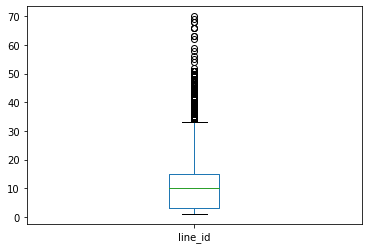

In [70]:
data_records[['line_id','station_id','sequence_id']].groupby('sequence_id').count().line_id.plot(kind = 'box')

In [71]:
data_records = data_records.merge(station_paths[['line_id','station_id','order','line_label']], on=['line_id','station_id'], how='left').dropna()

In [72]:
#grouping records into sequences after merging
last_line = {}
last_time = {}
seqID = {}
stations_passed = {}
terminal_flag = {'flag':True}

data_records['sequence_id'] = data_records[['vehicle_id','station_id','line_id','arrival_time','vehicle_type']].apply(lambda x : affect_seqID(*x), axis=1)

In [73]:
mask = data_records.groupby('sequence_id').station_id.count() < 2
drop_sequences = data_records.groupby('sequence_id').station_id.count()[mask].index
drop_sequences

Index(['100_0', '100_1001', '100_1003', '100_1005', '100_1007', '100_1018',
       '100_1019', '100_102', '100_1021', '100_1031',
       ...
       '99_621', '99_622', '99_67', '99_74', '99_75', '99_80', '99_87',
       '99_91', '99_95', '99_97'],
      dtype='object', name='sequence_id', length=21482)

In [74]:
data_records = data_records[~data_records.sequence_id.isin(drop_sequences)]

<AxesSubplot:>

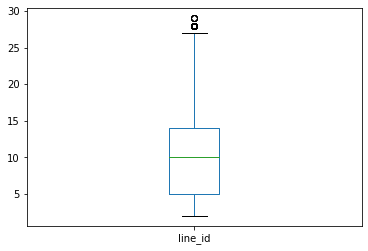

In [75]:
data_records[['line_id','station_id','sequence_id']].groupby('sequence_id').count().line_id.plot(kind = 'box')

In [76]:
data_records = data_records.sort_values(['vehicle_id', 'arrival_time'])
data_records['order_diff'] = data_records.groupby('sequence_id').order.diff()

In [77]:
def sequenceid(*x):
    vehicle = x[0]
    order_diff = x[1]
    
    if vehicle in seq_id : 
        if order_diff != 1 :
            seq_id[vehicle] += 1 
        return str(vehicle) + '_' + str(seq_id[vehicle])
    else : 
        seq_id[vehicle] = 0 
        return str(vehicle) + '_' + str(seq_id[vehicle])

In [78]:
seq_id = {}

#cut sequences of stops by order difference to get sequences of successive stops
data_records.line_id = data_records.line_id.astype(int)
data_records['sequence_id'] = data_records[['vehicle_id', 'order_diff']].apply(lambda x : sequenceid(*x), axis=1)

In [79]:
mask = data_records.groupby('sequence_id').station_id.count() < 2
drop_sequences = data_records.groupby('sequence_id').station_id.count()[mask].index
drop_sequences

Index(['100.0_100', '100.0_1000', '100.0_1004', '100.0_1005', '100.0_1014',
       '100.0_1015', '100.0_1016', '100.0_1018', '100.0_1022', '100.0_1033',
       ...
       '99.0_863', '99.0_865', '99.0_867', '99.0_87', '99.0_870', '99.0_871',
       '99.0_875', '99.0_878', '99.0_879', '99.0_883'],
      dtype='object', name='sequence_id', length=122707)

In [80]:
data_records = data_records[~data_records.sequence_id.isin(drop_sequences)]
data_records.order = data_records.order.astype(int)
data_records.drop(['order_diff', 'correct_line_id'], axis=1, inplace=True)
data_records.shape

(1899557, 11)

<AxesSubplot:>

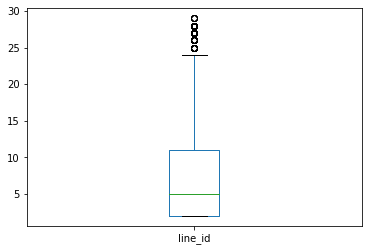

In [81]:
data_records[['line_id','station_id','sequence_id']].groupby('sequence_id').count().line_id.plot(kind = 'box')

In [82]:
data_records.groupby('line_label').count().line_id

line_label
1      157819
104     98275
11       4534
12       2044
15        280
15A       254
15B        45
2      196181
3       56504
32      55602
32B     15709
36        442
36B      1207
4      421374
43         24
43B      1635
4A      36722
5      233039
6      415504
65      21130
78      72121
79      19333
TGM     89779
Name: line_id, dtype: int64

In [83]:
#checkpoint
data_records.to_csv('data/picktime/picktime_sequences.csv', index=False)

## IV) Drop Outliers

In [2]:
data_records = pd.read_csv('data/picktime/picktime_sequences.csv')
data_records.info()

C:\Users\aziz\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899557 entries, 0 to 1899556
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   vehicle_id      int64  
 2   line_id         int64  
 3   arrival_time    object 
 4   departure_time  object 
 5   station_id      int64  
 6   vehicle_type    float64
 7   stop_time       float64
 8   sequence_id     object 
 9   order           int64  
 10  line_label      object 
dtypes: float64(2), int64(5), object(4)
memory usage: 159.4+ MB


In [3]:
station_paths = pd.read_csv('data/stations_paths.csv')
station_paths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      700 non-null    float64
 1   longitude     700 non-null    float64
 2   station_id    700 non-null    int64  
 3   line_id       700 non-null    int64  
 4   order         700 non-null    int64  
 5   english_name  700 non-null    object 
 6   french_name   700 non-null    object 
 7   arabic_name   700 non-null    object 
 8   path_id       700 non-null    int64  
 9   line_label    700 non-null    object 
 10  tag           700 non-null    int64  
 11  vehicle_type  700 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 65.8+ KB


In [4]:
#create target : travel_time (the time difference in seconds between two consecutive stops)
data_records.arrival_time = data_records.arrival_time.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data_records.departure_time = data_records.departure_time.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data_records['travel_time'] = data_records.groupby(['sequence_id']).arrival_time.diff().shift(-1).dt.total_seconds()

<AxesSubplot:xlabel='line_id', ylabel='travel_time'>

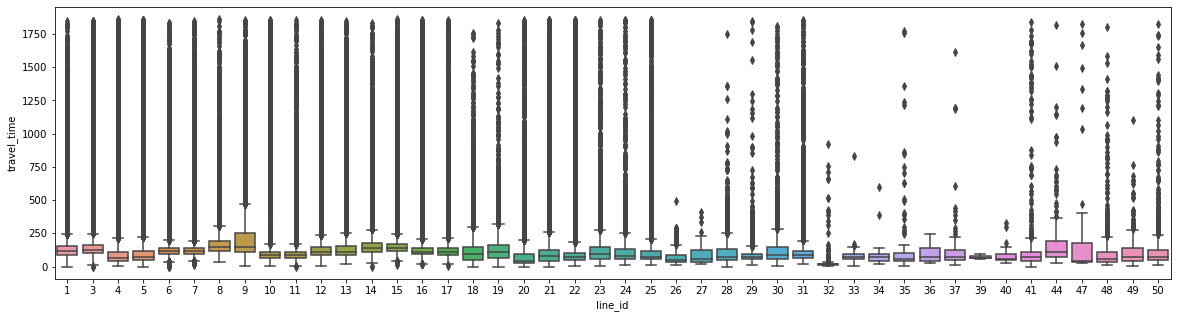

In [5]:
import seaborn as sns
plt.figure(figsize = (20,5))
sns.boxplot(data= data_records, x='line_id', y='travel_time')

In [7]:
#select range of datetimes between min (th = 30 secs) and (Q3 + (Q3-Q1)*3)   
#in max_range = Q3 + (Q3-Q1)*2.4, I chose 2.4 instead of 1.4 because I don't want to remove a lot of outliers.
#Sometimes huge delays occurs, there mut be a reason why that happens and both the graph and models need to be prepared
#for such delays

line_station_range = data_records.dropna().groupby(['line_id','station_id'],as_index=True).travel_time.describe()
EIQ = line_station_range['75%'] - line_station_range['25%']
line_station_range['max_range'] = line_station_range['75%'] +  EIQ * 2.4
line_station_range['min_range'] = line_station_range['min']
line_station_range = line_station_range[['max_range', 'min_range']].reset_index()

In [8]:
line_station_range = dict( ((line, station), (max_range,min_range)) for line, station, max_range,min_range in line_station_range.values)

In [10]:
def drop_outlier(*record):
    travel_time = record[0]
    line_id = record[1] 
    station_id = record[2]
    
    if np.isnan(travel_time):
        return False
    
    max_range = line_station_range[(line_id,station_id)][0]
    min_range = line_station_range[(line_id,station_id)][1]
    if min_range < 20 :
        min_range = 20
        
    if travel_time > max_range or travel_time < min_range:
        return True
    
    return False

In [11]:
mask_drop = data_records[['travel_time', 'line_id', 'station_id']].apply(lambda x : drop_outlier(*x), axis=1 )
mask_drop.value_counts()

False    1850106
True       49451
dtype: int64

In [12]:
data_records['outlier'] = data_records[['travel_time', 'line_id', 'station_id']].apply(lambda x : 1 if drop_outlier(*x) else 0 , axis=1 )

In [13]:
data_records.shape

(1899557, 13)

<AxesSubplot:xlabel='line_id', ylabel='travel_time'>

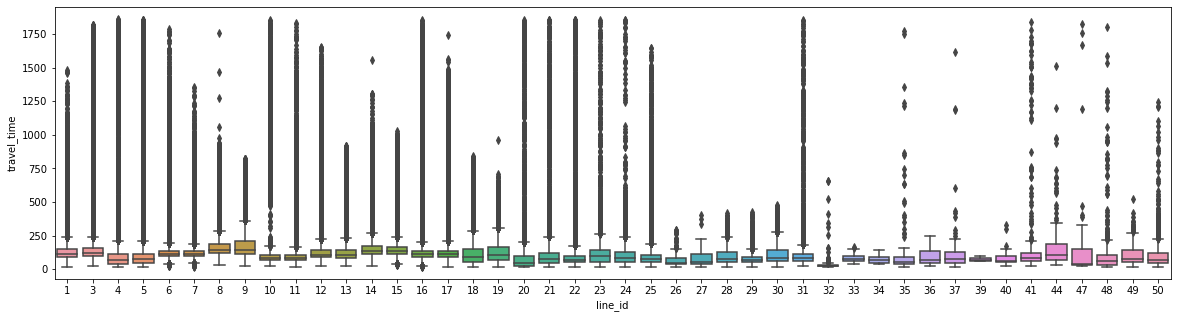

In [14]:
import seaborn as sns
plt.figure(figsize = (20,5))
sns.boxplot(data= data_records[data_records.outlier == 0], x='line_id', y='travel_time')

In [20]:
data_records = data_records.reset_index(drop=True).drop('Unnamed: 0', axis=1)

In [21]:
data_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899557 entries, 0 to 1899556
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   vehicle_id      int64         
 1   line_id         int64         
 2   arrival_time    datetime64[ns]
 3   departure_time  datetime64[ns]
 4   station_id      int64         
 5   vehicle_type    float64       
 6   stop_time       float64       
 7   sequence_id     object        
 8   order           int64         
 9   line_label      object        
 10  travel_time     float64       
 11  outlier         int64         
dtypes: datetime64[ns](2), float64(3), int64(5), object(2)
memory usage: 173.9+ MB


In [22]:
data_records.to_csv('data/gps_clean.csv', index = False)

## V) Data preprocessing part 2 : Extract full gps sequences data 

### 1) Select sequences of successive stops ( 6 stops or more ) 

In [23]:
station_paths = pd.read_csv('data/stations_paths.csv')
station_paths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      700 non-null    float64
 1   longitude     700 non-null    float64
 2   station_id    700 non-null    int64  
 3   line_id       700 non-null    int64  
 4   order         700 non-null    int64  
 5   english_name  700 non-null    object 
 6   french_name   700 non-null    object 
 7   arabic_name   700 non-null    object 
 8   path_id       700 non-null    int64  
 9   line_label    700 non-null    object 
 10  tag           700 non-null    int64  
 11  vehicle_type  700 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 65.8+ KB


In [24]:
data_records = pd.read_csv('data/gps_clean.csv', low_memory=False)
data_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899557 entries, 0 to 1899556
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   vehicle_id      int64  
 1   line_id         int64  
 2   arrival_time    object 
 3   departure_time  object 
 4   station_id      int64  
 5   vehicle_type    float64
 6   stop_time       float64
 7   sequence_id     object 
 8   order           int64  
 9   line_label      object 
 10  travel_time     float64
 11  outlier         int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 173.9+ MB


In [25]:
mask = data_records.groupby('sequence_id').station_id.count() > 5
select_sequences = data_records.groupby('sequence_id').station_id.count()[mask].index
select_sequences

Index(['100.0_1', '100.0_101', '100.0_1011', '100.0_102', '100.0_1028',
       '100.0_103', '100.0_1037', '100.0_1039', '100.0_104', '100.0_105',
       ...
       '99.0_888', '99.0_89', '99.0_90', '99.0_91', '99.0_92', '99.0_93',
       '99.0_95', '99.0_96', '99.0_97', '99.0_99'],
      dtype='object', name='sequence_id', length=122314)

In [26]:
data_records = data_records[data_records.sequence_id.isin(select_sequences)]

In [27]:
mask = data_records.groupby('line_label').count().line_id > 1000
selected_paths = data_records.groupby('line_label').count().line_id[mask].index

In [28]:
data_records = data_records[data_records.line_label.isin(selected_paths)]

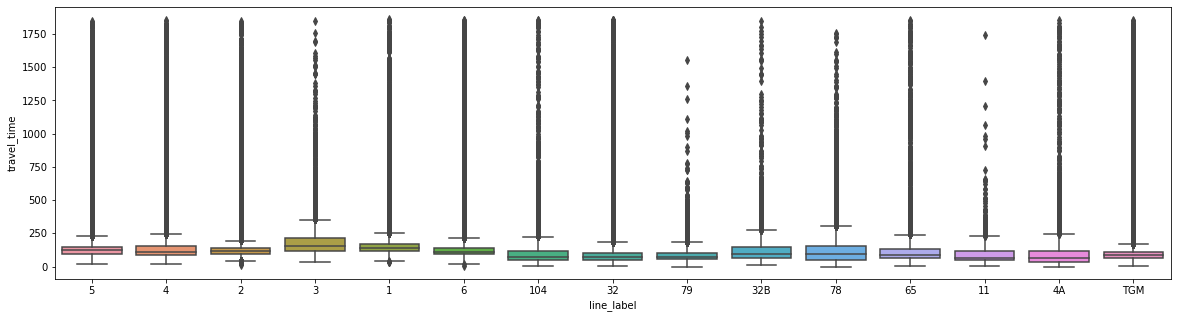

In [29]:
plt.figure(figsize = (20,5))
sns.boxplot(data= data_records, x='line_label', y='travel_time');

<AxesSubplot:>

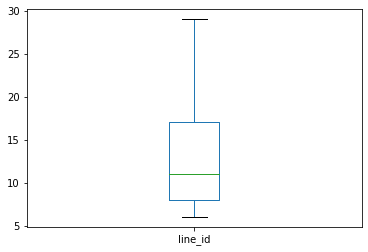

In [30]:
data_records[['line_id','station_id','sequence_id']].groupby('sequence_id').count().line_id.plot(kind = 'box')

In [31]:
data_records.shape

(1445940, 12)

In [32]:
data_records = data_records.sort_values(['vehicle_id','arrival_time'])

In [33]:
#Algorithm parameters init :
data_records_dict = dict( ((vehicle,sequence), datetime) \
                    for vehicle, sequence, datetime in \
                        data_records[['vehicle_id','sequence_id','arrival_time']].groupby(['vehicle_id','sequence_id'], as_index=False).arrival_time.agg(list).values )

In [34]:
vehicle_seq = dict( (vehicle, sequences) \
              for vehicle, sequences  in \
                  data_records[['vehicle_id','sequence_id']].groupby('vehicle_id', as_index=False).agg(list).values)

### 2) Full sequence picking algorithm

In [35]:
line_vehicletype = dict((key,value['line_id']) \
                        for key, value in station_paths[['line_id','vehicle_type']].drop_duplicates().groupby('vehicle_type').agg(list).T.to_dict().items())

In [36]:
def extract_vehicletype(line):
    if line in line_vehicletype[1]:
        return 1
    elif line in line_vehicletype[2]:
        return 2
    else:
        return 3

In [ ]:
import gc
from time import time
from tqdm import tqdm
# full pick tracking cell
# (vehicle_id, sequence_id)  : contains a list of successive datetime stops 

#algorithm details : 
#
#
#
#
#

#Notations: 
#record[0]  : vehicle_id from gps records
#record[-1] : datetime from gps records

size_chunk = int(input('please set the size of a chunk:\n'))

print('full pick time parameters initialization', end=' ... ')
start = time()
names = ['index', 'vehicle_id', 'vehicle_type', 'line_id', 'latitude', 'longitude', 'unkn_1', 'unkn_2', 'unkn_3', 'direction', 'unkn_4', 'unkn_5', 'datetime', 'last_modified']
full_gps = pd.read_csv('../database/gps.sql', chunksize=size_chunk, sep='\t', names=names)

#Algorithm parameters and data structres initialization :
data_records_dict = dict( ((vehicle,sequence), datetime) \
                    for vehicle, sequence, datetime in \
                        data_records[['vehicle_id','sequence_id','arrival_time']].groupby(['vehicle_id','sequence_id'], as_index=False).arrival_time.agg(list).values )

vehicle_seq = dict( (vehicle, sequences) \
              for vehicle, sequences in \
                  data_records[['vehicle_id','sequence_id']].groupby('vehicle_id', as_index=False).agg(list).values)

vehicle_stop = dict( (vehicle, station_id) \
                  for vehicle, station_id  in \
                      data_records[['vehicle_id','station_id']].groupby('vehicle_id', as_index=False).agg(list).values)

last_seq = {}
rec    = {}
total_seqs = data_records.sequence_id.nunique()
chunk = 1
seq_progress = 0
stop = time()
print('done in {:.2f} second(s)'.format(stop - start))

print('\n')
print('- - - - - - - - SEQUENCE - PICK - ALGORITHM - - - - - - - - - - -')

start = time()
for gps in full_gps :
    print('Loading data chunk N°: ', chunk, ' ...', end=' ')

    extracted_records = []
    stop = time()
    print('done in {:.2f} second(s)'.format(stop - start))

    
    print('GPS data preprocessing ...', end=' ')
    start = time()
    
    #drop features
    gps.drop(['index','vehicle_type','last_modified','unkn_1','unkn_2','unkn_3','unkn_4','unkn_5'], axis=1, inplace=True)

    #sorting by vehicle_id and datetime is critical for the full pick algorithm
    gps = gps.sort_values(['vehicle_id','datetime'])
    gps = gps.drop_duplicates()
    
    stop = time()
    print('done in {:.2f} second(s)'.format(stop - start))

    for record in tqdm(gps.values, position=0, leave=True, desc='Full sequence picking : ') :            
        
        vehicle = record[0]
        record_datetime = record[-1]

        if vehicle not in rec : 
            rec[vehicle] = False

        try:   
            #extract records
            if rec[vehicle] :
                # extracted_records ==> [ current_sequence_id, last_stop, gps records]
                extracted_records.append(np.concatenate([[vehicle_seq[vehicle][0]], [vehicle_stop[vehicle][0]], record]))
            
            if record_datetime == data_records_dict[(vehicle, vehicle_seq[vehicle][0])][0] :
                #point to the next stop and update algorithms parameters
                del data_records_dict[(vehicle, vehicle_seq[vehicle][0])][0]    #get the next datetime where the vehicle has arrived to a stop
                last_seq[vehicle] = vehicle_seq[vehicle][0]    #save last sequence id
                del vehicle_seq[vehicle][0]     #get the next record sequence id
                del vehicle_stop[vehicle][0]    #get the next record stop id

                #skip records if sequence id has changed until we match the first stop of the new sequence
                if last_seq[vehicle] == vehicle_seq[vehicle][0]:
                    rec[vehicle] = True    #activate records extraction flag
                else :
                    rec[vehicle] = False  #desactivate records extraction flag
                    seq_progress += 1
        except:
            continue

    print('Extracted records : ', len(extracted_records), '    sequence picking progression : {:.2f}%'.format(seq_progress*100 / total_seqs ))
    #break
    #checkpoint
    print('data checkpoint ...', end=' ')
    start = time()
    cols = ['sequence_id','station_id','vehicle_id','line_id','latitude','longitude','direction','datetime']
    extracted_records = pd.DataFrame(data=extracted_records, columns=cols)
    extracted_records['vehicle_type'] = extracted_records.line_id.apply(extract_vehicletype)
    extracted_records = extracted_records.sort_values(['vehicle_id','datetime']).reset_index(drop=True)
    extracted_records.to_csv('data/fullpick/fullpick_chunk{}.csv'.format(chunk), index = False)
    stop = time()
    print('done in {:.2f} second(s)'.format(stop - start))
    
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
    
    chunk += 1
    del extracted_records
    gc.collect()
    start = time()

please set the size of a chunk:
 10000000


full pick time parameters initialization ... done in 4.76 second(s)


- - - - - - - - SEQUENCE - PICK - ALGORITHM - - - - - - - - - - -
Loading data chunk N°:  1  ... done in 20.27 second(s)
GPS data preprocessing ... done in 17.30 second(s)


Full sequence picking : 100%|████████████████████████████████████████████| 9946929/9946929 [01:02<00:00, 158770.83it/s]


Extracted records :  6869074     sequence picking progression : 8.84%
data checkpoint ... done in 83.73 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  2  ... done in 25.30 second(s)
GPS data preprocessing ... done in 17.46 second(s)


Full sequence picking : 100%|████████████████████████████████████████████| 9956003/9956003 [00:47<00:00, 211013.28it/s]


Extracted records :  4544505     sequence picking progression : 16.07%
data checkpoint ... done in 44.73 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  3  ... done in 57.64 second(s)
GPS data preprocessing ... done in 21.25 second(s)


Full sequence picking : 100%|████████████████████████████████████████████| 9952930/9952930 [00:35<00:00, 277613.51it/s]


Extracted records :  2955314     sequence picking progression : 22.29%
data checkpoint ... done in 30.64 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  4  ... done in 45.49 second(s)
GPS data preprocessing ... done in 25.60 second(s)


Full sequence picking : 100%|████████████████████████████████████████████| 9950096/9950096 [00:43<00:00, 230304.03it/s]


Extracted records :  3059904     sequence picking progression : 28.71%
data checkpoint ... done in 34.87 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  5  ... done in 29.28 second(s)
GPS data preprocessing ... done in 24.89 second(s)


Full sequence picking : 100%|████████████████████████████████████████████| 9959729/9959729 [00:46<00:00, 216145.94it/s]


Extracted records :  4242076     sequence picking progression : 35.58%
data checkpoint ... done in 40.08 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  6  ... done in 19.80 second(s)
GPS data preprocessing ... done in 19.05 second(s)


Full sequence picking : 100%|████████████████████████████████████████████| 9942610/9942610 [01:08<00:00, 144787.77it/s]


Extracted records :  7709464     sequence picking progression : 44.59%
data checkpoint ... done in 87.49 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  7  ... done in 51.00 second(s)
GPS data preprocessing ... done in 17.88 second(s)


Full sequence picking :  31%|█████████████▍                              | 3046655/9953251 [00:24<00:38, 177359.05it/s]

In [ ]:
import pandas as pd
fullpick = pd.read_csv('data/fullpick/fullpick_chunk10.csv')

In [ ]:
fullpick.info()

In [ ]:
paths = pd.read_csv('data/paths.csv')
data_records = data_records.merge(paths[['line_id','french_name']], how='left', on='line_id')

In [ ]:
data_records = data_records.merge(station_paths[['station_id','latitude','longitude']], on='station_id' )

In [ ]:
sequence_population = list(fullpick.sequence_id.unique())

In [ ]:
import random
import matplotlib.pyplot as plt

sequence_sample = random.sample(sequence_population,6)
fig, axs = plt.subplots(3, 2, figsize=(18,13))

plot_idx = [[0,0],[0,1],[1,0],[1,1],[2,0],[2,1]]
for k,sequence_id in enumerate(sequence_sample) :

    path = data_records[data_records.sequence_id == sequence_id].line_label.unique().item()
    path_direction = data_records[data_records.sequence_id == sequence_id].french_name.unique().item()

    x = fullpick[fullpick.sequence_id == sequence_id].latitude.values
    y = fullpick[fullpick.sequence_id == sequence_id].longitude.values

    st_x = data_records[data_records.sequence_id == sequence_id].latitude.values
    st_y = data_records[data_records.sequence_id == sequence_id].longitude.values
    st_order =  data_records[data_records.sequence_id == sequence_id].order.values

    i, j = plot_idx[k]
    axs[i,j].set_title('sequence id : ' + sequence_id + '  vehicle id : ' + sequence_id.split('.')[0] + '  path : ' + path + ' ( ' + path_direction + ' ) ')

    for k, order in enumerate(st_order):
        axs[i,j].annotate(order, (st_x[k],st_y[k]), fontsize = 15)
    axs[i,j].plot(x,y,'.')

    axs[i,j].plot(st_x,st_y, 'ro')

plt.tight_layout()
plt.show()